## Import

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

## Read preprocessed CSV into dataframe

In [8]:
locations = pd.read_csv('data/processed/c101.csv')
locations.head()

Unnamed: 0  CustomerNO   Lng   Lat  Demand  ReadyTime     Due  ServiceTime
0           0           1  40.0  50.0     0.0        0.0  1236.0          0.0
1           1           2  45.0  68.0    10.0      912.0   967.0         90.0
2           2           3  45.0  70.0    30.0      825.0   870.0         90.0
3           3           4  42.0  66.0    10.0       65.0   146.0         90.0
4           4           5  42.0  68.0    10.0      727.0   782.0         90.0

## Plot locations
### Remove depot from locations to plot it as an own point

In [9]:
depot = locations.iloc[0]

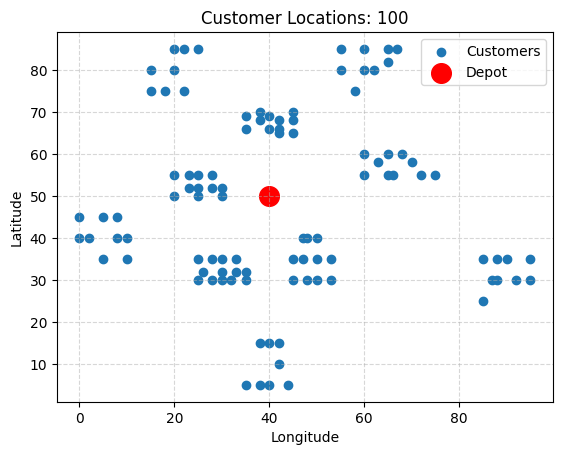

In [10]:
plt.title(f'Customer Locations: {len(locations) - 1}')
plt.scatter(locations.iloc[1:]['Lng'], locations.iloc[1:]['Lat'])
plt.scatter(depot['Lng'], depot['Lat'], color='red', s=200)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(['Customers', 'Depot'])
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## Run algorithm

In [11]:
from sia.aco import ACO, ACOParameters

n_locations = len(locations)
alpha = 0.9
beta = 2.0
evaporation_rate = 0.5

n_vehicles = 25
n_iterations = 100
max_capacity = 100

# Initialize parameters and ACO algorithm
aco_params = ACOParameters(n_locations=n_locations, alpha=alpha, beta=beta, evaporation_rate=evaporation_rate)
aco = ACO(locations_df=locations, n_vehicles=n_vehicles, n_iterations=n_iterations, aco_params=aco_params, max_capacity=max_capacity)

# Run ACO
vehicle_solutions, best_distances, time_window_violations, max_customers_visited, total_distances, best_solution_index = aco.run_loop()

______________________________________________ITERATION 1______________________________________________
VEHICLE 1
Visiting customer 43 with current time 0.0, travel time 16.55294535724685, demand 10.0
Arrived on time at 43
Remaining capacity 90.0, unvisited customers: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
Visiting customer 41 with current time 106.55294535724684, travel time 3.605551275463989, demand 10.0
Early violation at 41, current penalty 50
Remaining capacity 80.0, unvisited customers: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 

## Print and plot results

Best solution (Index: 30)
Route 1: 13 -> 17 -> 18 -> 19 -> 84 | Distance travelled: 133.09 | Time window violations: 0
Route 2: 67 -> 65 -> 63 -> 62 -> 66 | Distance travelled: 89.76 | Time window violations: 1
Route 3: 5 -> 3 -> 7 -> 8 -> 10 -> 11 -> 6 | Distance travelled: 101.57 | Time window violations: 1
Route 4: 43 -> 42 -> 41 -> 40 -> 44 -> 46 -> 45 | Distance travelled: 53.74 | Time window violations: 0
Route 5: 20 -> 24 -> 25 -> 27 -> 29 -> 30 -> 61 | Distance travelled: 89.02 | Time window violations: 0
Route 6: 90 -> 96 -> 95 -> 94 -> 92 -> 9 -> 4 | Distance travelled: 160.06 | Time window violations: 1
Route 7: 57 -> 55 -> 54 -> 59 | Distance travelled: 133.46 | Time window violations: 1
Route 8: 32 -> 33 -> 31 -> 35 | Distance travelled: 82.09 | Time window violations: 0
Route 9: 21 -> 49 -> 47 | Distance travelled: 97.34 | Time window violations: 1
Route 10: 98 -> 87 -> 86 -> 83 -> 70 -> 73 | Distance travelled: 151.68 | Time window violations: 0
Route 11: 26 -> 51 -> 50 

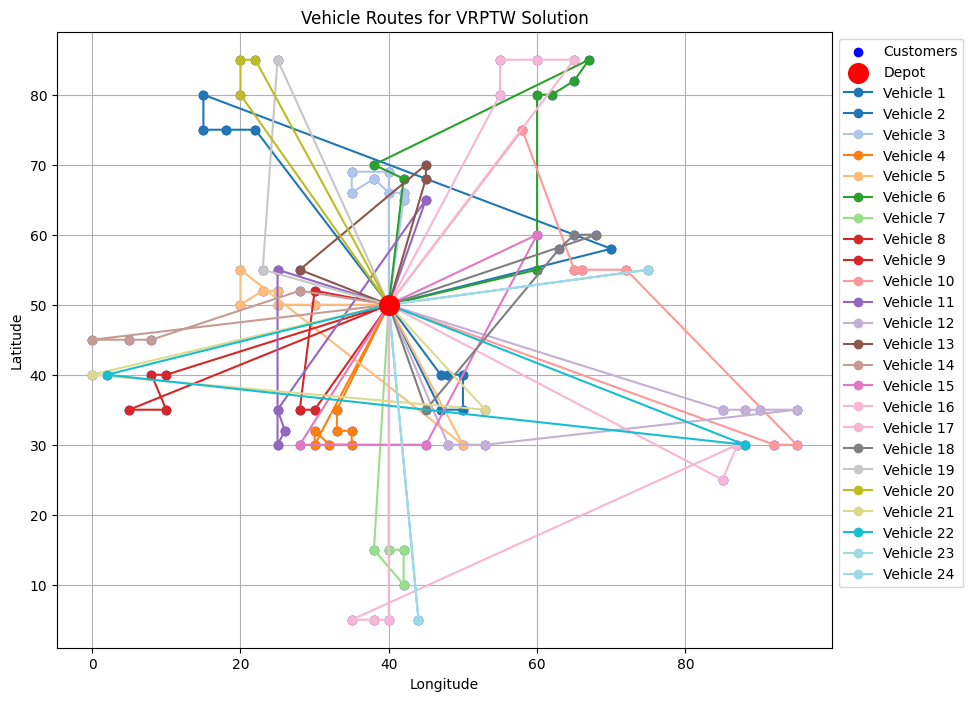

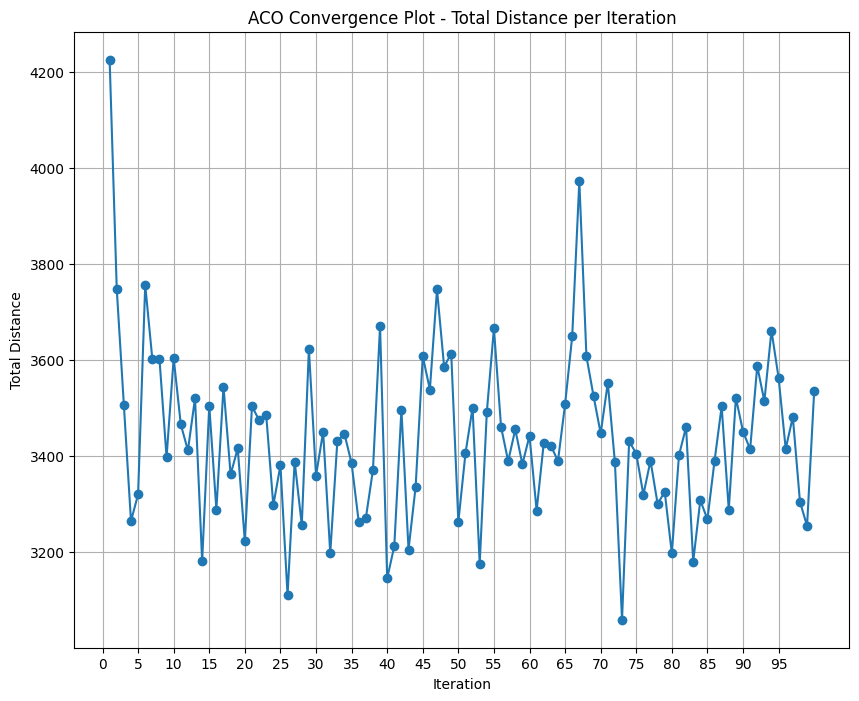

In [12]:
from utils.plotters.solution_visualizer import SolutionVisualizer

SolutionVisualizer.print_solutions(vehicle_solutions, best_distances, time_window_violations, max_customers_visited, best_solution_index)
SolutionVisualizer.plot_vehicle_routes(locations, vehicle_solutions)
SolutionVisualizer.plot_convergence(total_distances, n_iterations)